<a href="https://colab.research.google.com/github/atonui/neural_networks_raw/blob/main/neural_networks_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
inputs = [1, 2, 3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5

output = [inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
          inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
          inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3]
print(output)

[4.8, 1.21, 2.385]


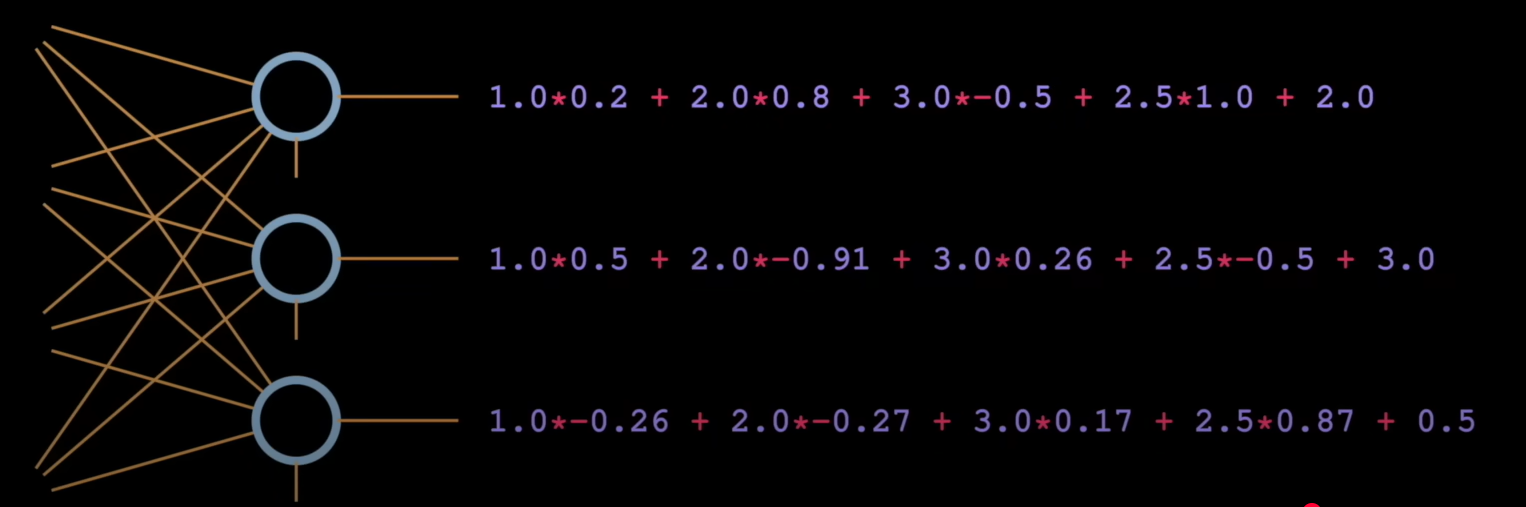

Code cleanup

In [2]:
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

layer_outputs = [] # output of current layer
for neuron_weights, neuron_bias in zip(weights, biases):
  neuron_output = 0 # output of given neuron
  for n_input, weight in zip(inputs, neuron_weights):
    neuron_output += n_input*weight
  neuron_output += neuron_bias
  layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


## Dot product
$$ a = [1,2,3] \\
b = [2,3,4] \\
dot \; product = a[0]*b[0]+a[1]*b[1]+a[2]*b[2] \\
= (1*2)+(2*3)+(3*4) \\
= 20 $$

$$\vec{a} · \vec{b} = [1,2,3] · [2,3,4] = 1·2+2·3+3\cdot4=20$$

The dot product of two vectors results in a single scalar value.

In [3]:
import numpy as np
# inputs = [1.0,2.0,3.0,2.5]
weights = [0.2,0.8,-0.5,1.0]
bias = 2

output = np.dot(weights, inputs) + bias
# multiplying each element at the same index and adding up the result
print(output)

4.8


In [4]:
# repeating the operation but with a layer of neutrons
# inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

output = np.dot(weights, inputs) + biases
print('dot', output)
output2 = (np.array(weights) @ np.array(inputs)) + np.array(biases)
print('@', output2)

dot [4.8   1.21  2.385]
@ [4.8   1.21  2.385]


### Matrix dot product
$$(m×n) \cdotp (n×1) ⇒ m×1$$
$$(m×a) \cdotp (a×b) ⇒ m×b$$

For dot product betwwen a matrix and a vector, just view the vector as a column matrix.

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
·
\begin{bmatrix}
1 & 2 & 3 \\
\end{bmatrix}
⇒
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
·
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
=
\begin{bmatrix}
14 \\
32 \\
50
\end{bmatrix}
$$

## Batches, Layers and Objects
Why batch?
- To allow for parallel processing -> also why we run NN's on GPU's rather than CPU's
- Helps with generalisations i.e. allow the model to see multiple samples of data at a time so as to generalise better. Batch size of 32, 64 maybe 128

In [5]:
# increasing the input batches now
inputs = [[1.0,2.0,3.0,2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

output = np.dot(inputs, np.array(weights).T) + biases
print('dot\n', output)

dot
 [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [6]:
# adding another layer to the network
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

layer1_output = np.dot(inputs, np.array(weights).T) + biases
print('Layer 1 Outputs\n', layer1_output,'\n')

layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2
print('Layer 2 Outputs\n', layer2_output)


Layer 1 Outputs
 [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]] 

Layer 2 Outputs
 [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


A better neuron architechture

Each neuron can be expressed thus:
$$y=wx+b$$
where:
$$
w → weight \\
x → input \\
b → bias$$

In [15]:
np.random.seed(0)
X = [[1.0,2.0,3.0,2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]
# X is the input data to the neural network. It has 3 samples

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
    # weights matrix is determined by the size of the input coming into each neuron and how many neurons do we want
    self.biases = np.zeros((1, n_neurons))
    ''' each neuron has 1 bias value so the shape is 1 x number of neurons
    we initialise the bias to zeros but if you have a dead network i.e. the neurons are not firing/ learning, you may want to adjust this'''
    pass
  def forward(self, inputs):
    self.output = inputs @ self.weights + self.biases

layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)

layer1.forward(X)
print(layer1.output)
print('\n')
# the output of layer1 is the input of layer 2
layer2.forward(layer1.output)
print(layer2.output)


[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]


[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


In [12]:
print(np.zeros(4))

[0. 0. 0. 0.]
